# Pending Project Name


In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### List of Contents
#### 1. Data Load
#### 2. Data Consistency and Merge
#### 3. Customer Profile Creation
#### 4. Customer Profile Visualization
#### 5. Customer Profile Aggregates
#### 6. Customer Profile by Region and Department


#### 1. Data Load

In [2]:
# create path to project folder
path = r'C:\Users\chris\OneDrive\Documents\11-23-2023 Instacart Basket Analysis'


In [3]:
# load instacart data as dataframe
df_instacart = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart_data.pkl'))

In [4]:
# load department id data as dataframe
df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

#### 2. Data Consistency and Merge

In [5]:
# check dimensions in dataframe
df_instacart.shape

(32404859, 31)

In [6]:
# verify instacart data set head
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region_flag,user_activity
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active


In [7]:
# verify department dataframe dimensions
df_dept.shape

(21, 2)

In [8]:
# verify department dataframe contents
df_dept.head(21)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
# verify df_dept columns
df_dept.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [10]:
# change column name to 'department_id'
df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [11]:
# verify new column name
df_dept.columns

Index(['department_id', 'department'], dtype='object')

In [12]:
# confirm 'department_id' data type from df_instacart
df_instacart['department_id'].dtype

dtype('int64')

In [13]:
# confirm 'department_id' data type from df_dept
df_dept['department_id'].dtype

dtype('int64')

In [14]:
# merge the instacart and deparment dataframes using the 'department_id' column
df_merge = df_instacart.merge(df_dept, on = 'department_id', indicator = True)

In [16]:
# check new dataframe 
df_merge.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_of_dependants,family_status,income,region_flag,user_activity,department,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,both


In [17]:
# check for value counts
df_merge['_merge'].value_counts()

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [18]:
# verify dataframe dimensions
df_merge.shape

(32404859, 33)

In [19]:
# drop '_merge' column from the dataframe
df_merge = df_merge.drop(columns = '_merge')

In [21]:
# confirm column drop
df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'prices_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_orders', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income', 'region_flag', 'user_activity', 'department'],
      dtype='object')

#### 3. Customer Profile Creation

In [22]:
# crosstab 'number_of_dependanys' and 'family_Status' 
marital_dependants_crosstab = pd.crosstab(df_merge['number_of_dependants'],df_merge['family_status'],dropna=False)

In [23]:
# show new dataframe output
marital_dependants_crosstab

family_status,divorced/widowed,living with parents and siblings,married,single
number_of_dependants,,,,
0,2771812,0,0,5325691
1,0,530200,7550904,0
2,0,507963,7583180,0
3,0,512440,7622669,0


This crosstab confirms that 'divorced/widowed' and 'single' customers do not have dependants, while 'married' and 'living with parents and siblings' customers all contain dependants. 

In [24]:
# create 'No dependants' value for the 'dependant_status' column
df_merge.loc[df_merge['number_of_dependants'] <= 0, 'dependant_status'] = 'No dependants'

In [25]:
# create 'Has dependants' value for the 'dependant_status' column
df_merge.loc[df_merge['number_of_dependants'] > 0, 'dependant_status'] = 'Has dependants'

In [26]:
# verify new column and values
df_merge['dependant_status'].value_counts()

dependant_status
Has dependants    24307356
No dependants      8097503
Name: count, dtype: int64

In [27]:
# verify 'age' descriptive statistics
df_merge['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

We can create a column for 4 different age groups based on the results from the previous function.
18 - 33 years, 34 to 49 years, 50 to 65 years, and 66 to 75 years.

In [28]:
# create the '18 to 33 years' value for the 'age_group' column
df_merge.loc[(df_merge['age'] >= 18) & (df_merge['age'] <= 33), 'age_group'] = '18 to 33 years'

In [29]:
# create the '34 to 49 years' value for the 'age_group' column
df_merge.loc[(df_merge['age'] >= 34) & (df_merge['age'] <= 49), 'age_group'] = '34 to 49 years'

In [30]:
# create the '50 to 65 years' value for the 'age_group' column
df_merge.loc[(df_merge['age'] >= 50) & (df_merge['age'] <= 65), 'age_group'] = '50 to 65 years'

In [31]:
# create the '66 to 81 years' value for the 'age_group' column
df_merge.loc[(df_merge['age'] >= 66) & (df_merge['age'] <= 81), 'age_group'] = '66 to 81 years'

In [32]:
# check new column and value counts
df_merge['age_group'].value_counts(dropna = False)

age_group
34 to 49 years    8153117
18 to 33 years    8120312
66 to 81 years    8088101
50 to 65 years    8043329
Name: count, dtype: int64

In [33]:
# verify 'income' descriptive statistics
df_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

The above results can be used to create a new flag for customers based on their income level. 
Less than 670,040  = Low Income,
Between 670,040 and 1,279,120 = Average Income,
More than 1,279,120 = High Income.

In [34]:
# create 'Low income' value for the 'income_level' column
df_merge.loc[df_merge['income'] <= 67004, 'income_level'] = 'Low income'

In [35]:
# create 'Average income' value for the 'income_level' column
df_merge.loc[(df_merge['income'] > 67004) & (df_merge['income'] < 127912), 'income_level'] = 'Average income'

In [36]:
# create 'High income' value for the 'income_level' column
df_merge.loc[df_merge['income'] >= 127912, 'income_level'] = 'High income'

In [37]:
# Verify new column and value counts
df_merge['income_level'].value_counts(dropna = False)

income_level
Average income    16201927
Low income         8101644
High income        8101288
Name: count, dtype: int64

In [38]:
# crosstab 'dependant_status' and 'age_group'
age_family_crosstab = pd.crosstab(df_merge['family_status'],df_merge['age_group'],dropna=False)

In [39]:
# check output
age_family_crosstab

age_group,18 to 33 years,34 to 49 years,50 to 65 years,66 to 81 years
family_status,,,,
divorced/widowed,0,0,773897,1997915
living with parents and siblings,1550603,0,0,0
married,4542396,6130902,5993269,6090186
single,2027313,2022215,1276163,0


There are no divorced/widowed customers within the age groups between 18 and 49 years. The only age group that is living with parent and siblings is the 18 to 33 years age group. There are no single customers within the 66 to 81 years old age group.

In [40]:
# create 'Married young adult' value for 'customer_profile_1' column
df_merge.loc[(df_merge['age_group'] == '18 to 33 years') & (df_merge['family_status'] == 'married') & (df_merge['dependant_status'] == 'Has dependants'), 'customer_profile_1'] = 'Married young adult'

In [41]:
# create 'Married adult' value for 'customer_profile_1' column
df_merge.loc[(df_merge['age_group'].isin(['34 to 49 years','50 to 65 years'])) & (df_merge['family_status'] == 'married') & (df_merge['dependant_status'] == 'Has dependants'), 'customer_profile_1'] = 'Married adult'

In [42]:
# create 'Married old adult' value for 'customer_profile_1' column
df_merge.loc[(df_merge['age_group'] == '66 to 81 years') & (df_merge['family_status'] == 'married') & (df_merge['dependant_status'] == 'Has dependants'), 'customer_profile_1'] = 'Married old adult'

In [43]:
# create 'Single young adult w/ dependants' value for 'customer_profile_1' column
df_merge.loc[(df_merge['age_group'] == '18 to 33 years') & (df_merge['family_status'] == 'living with parents and siblings') & (df_merge['dependant_status'] == 'Has dependants'), 'customer_profile_1'] = 'Single young adult w/ dependants'

In [44]:
# create 'Single young adult w/o dependants' value for 'customer_profile_1' column
df_merge.loc[(df_merge['age_group'] == '18 to 33 years') & (df_merge['family_status'] == 'single') & (df_merge['dependant_status'] == 'No dependants'), 'customer_profile_1'] = 'Single young adult w/o dependants'

In [45]:
# create 'Single adult' value for 'customer_profile_1' column
df_merge.loc[(df_merge['age_group'].isin(['34 to 49 years','50 to 65 years'])) & (df_merge['family_status'].isin(['divorced/widowed','single'])) & (df_merge['dependant_status'] == 'No dependants'), 'customer_profile_1'] = 'Single adult'

In [46]:
# create 'Single old adult' value for 'customer_profile_1' column
df_merge.loc[(df_merge['age_group'] == '66 to 81 years') & (df_merge['family_status'].isin(['divorced/widowed','single'])) & (df_merge['dependant_status'] == 'No dependants'), 'customer_profile_1'] = 'Single old adult'

In [47]:
# verify new column and value count
df_merge['customer_profile_1'].value_counts(dropna = False)

customer_profile_1
Married adult                        12124171
Married old adult                     6090186
Married young adult                   4542396
Single adult                          4072275
Single young adult w/o dependants     2027313
Single old adult                      1997915
Single young adult w/ dependants      1550603
Name: count, dtype: int64

#### 4. Customer Profile Visualization

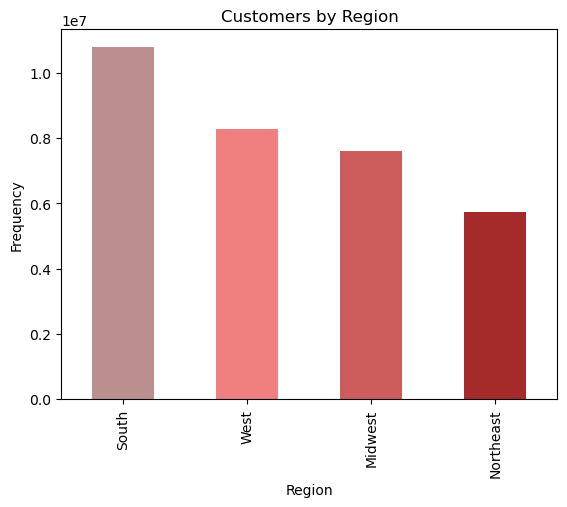

In [48]:
# create bar chart for age group
region_bar = df_merge['region_flag'].value_counts().plot.bar(color = ['rosybrown','lightcoral','indianred','brown'])
plt.title('Customers by Region')
plt.xlabel('Region')
plt.ylabel('Frequency');

In [49]:
# export customer region flag chart as png file
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_region_bar.png'))

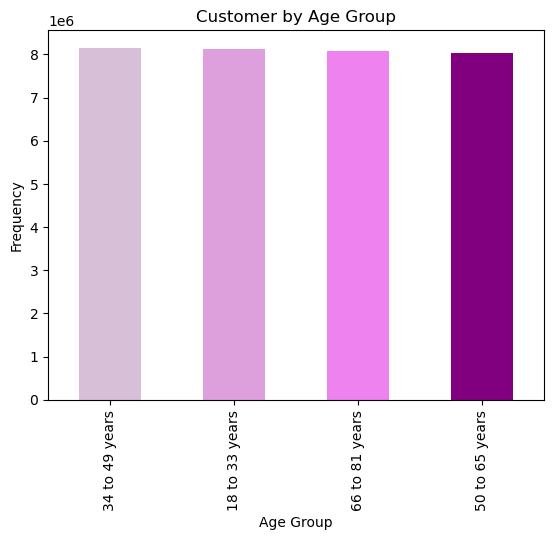

In [50]:
# create bar chart for age group
age_bar = df_merge['age_group'].value_counts().plot.bar(color = [ 'thistle','plum','violet','purple'])
plt.title('Customer by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency');

In [51]:
# export customer age group chart as png file
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_age_bar.png'))

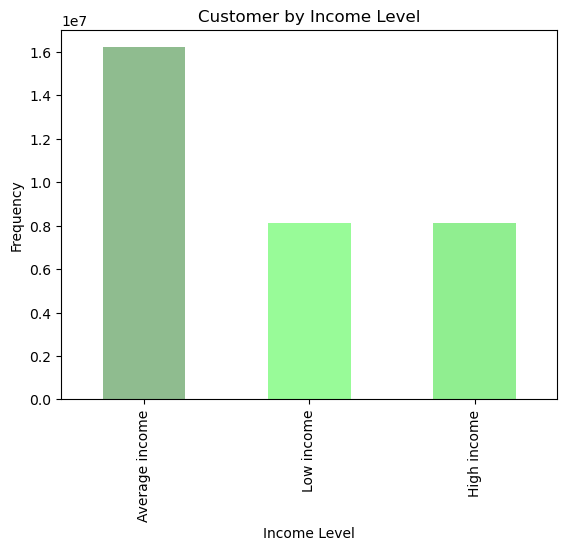

In [52]:
# create bar chart for income level
income_bar = df_merge['income_level'].value_counts().plot.bar(color = ['darkseagreen','palegreen','lightgreen'])
plt.title('Customer by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Frequency');

In [53]:
# export customer age group chart as png file
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_income_bar.png'))

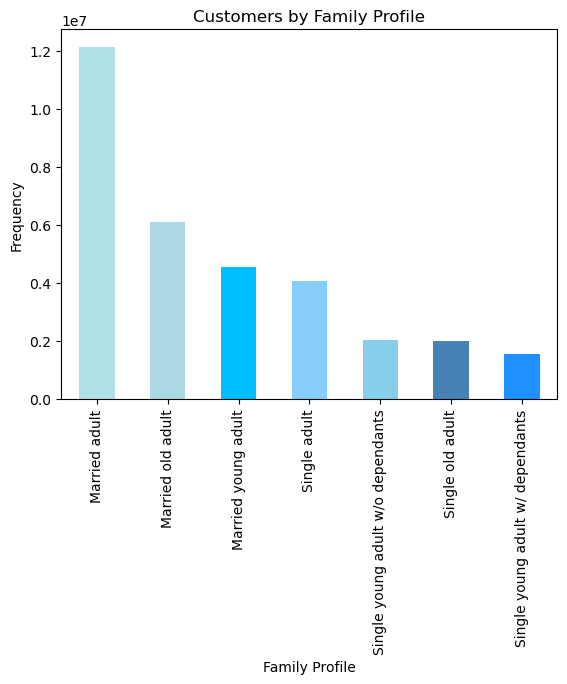

In [54]:
# create bar chart for customer_profile
profile_bar = df_merge['customer_profile_1'].value_counts().plot.bar(color = [ 'powderblue','lightblue','deepskyblue','lightskyblue','skyblue','steelblue','dodgerblue'])
plt.title('Customers by Family Profile')
plt.xlabel('Family Profile')
plt.ylabel('Frequency');

In [55]:
# export customer age group chart as png file
profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_bar.png'))

#### 5. Customer Profile Aggregation

In [56]:
# aggregate mean, maximum, and minimum for customer age group
age_aggregate = df_merge.groupby('age_group')[['days_since_last_order','prices']].agg(['min','max','mean'])

In [57]:
# check new aggregate
age_aggregate

days_since_last_order                  prices           \
                                 min   max       mean    min      max   
age_group                                                               
18 to 33 years                   0.0  30.0  10.423159    1.0  99999.0   
34 to 49 years                   0.0  30.0  10.366645    1.0  99999.0   
50 to 65 years                   0.0  30.0  10.410391    1.0  99999.0   
66 to 81 years                   0.0  30.0  10.370671    1.0  99999.0   

                           
                     mean  
age_group                  
18 to 33 years  12.088345  
34 to 49 years  12.239924  
50 to 65 years  11.750363  
66 to 81 years  11.838480

In [58]:
# aggregate mean, maximum, and minimum for customer income level
income_aggregate = df_merge.groupby('income_level')[['days_since_last_order','prices']].agg(['min','max','mean'])

In [59]:
# check new aggregate
income_aggregate

days_since_last_order                  prices           \
                                 min   max       mean    min      max   
income_level                                                            
Average income                   0.0  30.0  10.343852    1.0  99999.0   
High income                      0.0  30.0  10.330269    1.0  99999.0   
Low income                       0.0  30.0  10.552696    1.0  14900.0   

                           
                     mean  
income_level               
Average income   9.292731  
High income     22.043869  
Low income       7.291562

In [60]:
# aggregate mean, maximum, and minimum for customer age group
profile_aggregate = df_merge.groupby('customer_profile_1')[['days_since_last_order','prices']].agg(['min','max','mean'])

In [61]:
# check new aggregate
profile_aggregate

days_since_last_order                   \
                                                    min   max       mean   
customer_profile_1                                                         
Married adult                                       0.0  30.0  10.408174   
Married old adult                                   0.0  30.0  10.370891   
Married young adult                                 0.0  30.0  10.433750   
Single adult                                        0.0  30.0  10.329407   
Single old adult                                    0.0  30.0  10.370000   
Single young adult w/ dependants                    0.0  30.0  10.345887   
Single young adult w/o dependants                   0.0  30.0  10.458529   

                                  prices                      
                                     min      max       mean  
customer_profile_1                                            
Married adult                        1.0  99999.0  11.950910  
Married old adult                    1.0  99999.0  11.800189  
Married young adult                  1.0  99999.0  12.427274  
Single adult                         1.0  99999.0  12.133435  
Single old adult                     1.0  99999.0  11.955202  
Single young adult w/ dependants     1.0  99999.0  10.828768  
Single young adult w/o dependants    1.0  99999.0  12.292337

In [62]:
# aggregate mean, maximum, and minimum for customer age group
dependant_aggregate = df_merge.groupby('dependant_status')[['days_since_last_order','prices']].agg(['min','max','mean'])

In [63]:
# check new aggregate
dependant_aggregate

days_since_last_order                  prices           \
                                   min   max       mean    min      max   
dependant_status                                                          
Has dependants                     0.0  30.0  10.399639    1.0  99999.0   
No dependants                      0.0  30.0  10.371750    1.0  99999.0   

                             
                       mean  
dependant_status             
Has dependants    11.930584  
No dependants     12.129243

In [64]:
# aggregate mean, maximum, and minimum for customer age group
income_family_profile = pd.crosstab(df_merge['customer_profile_1'],df_merge['income_level'],dropna=False)

In [98]:
# check new aggregate
income_family_profile

income_level,Average income,High income,Low income
customer_profile_1,,,
Married adult,5991443,3660618,2472110
Married old adult,2945323,2339648,805215
Married young adult,2383753,49720,2108923
Single adult,1985295,1253128,833852
Single old adult,986576,759344,251995
Single young adult w/ dependants,839116,17948,693539
Single young adult w/o dependants,1070421,20882,936010


In [66]:
# create a crosstab for 'frequency_flag' and 'age_group'
age_group_frequency = pd.crosstab(df_merge['order_frequency_flag'], df_merge['age_group'], dropna = False)
   

In [99]:
# check new crosstab
age_group_frequency

age_group,18 to 33 years,34 to 49 years,50 to 65 years,66 to 81 years
order_frequency_flag,,,,
Frequent customer,5701370,5737562,5652586,5705141
Non-frequent customer,677191,679423,668067,662047
Regular customer,1741751,1736132,1722676,1720913


#### 6. Customer Profile by Region and Department

In [100]:
# group data by 'age_group' and 'region_flag'
age_region = df_merge.groupby(['region_flag','age_group']).size().unstack()

In [101]:
# check new dataframe
age_region

age_group,18 to 33 years,34 to 49 years,50 to 65 years,66 to 81 years
region_flag,,,,
Midwest,1889049,1939142,1887497,1881637
Northeast,1431237,1428325,1404222,1458952
South,2737766,2714981,2669718,2669420
West,2062260,2070669,2081892,2078092


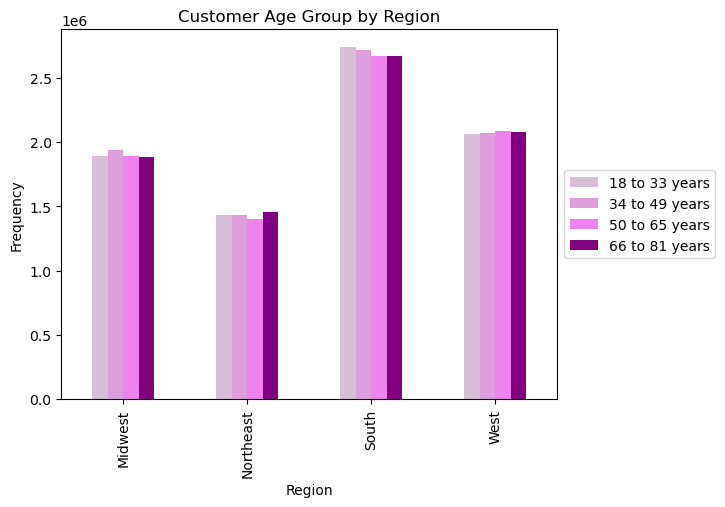

In [102]:
# create horizontal bar graph for 'age_region_bar'
age_region_bar = age_region.plot.bar(color = [ 'thistle','plum','violet','purple'], stacked = False, title = 'Customer Age Group by Region', xlabel = 'Region', ylabel = 'Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [103]:
# export 'age_region_bar' as png file
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_age_region_bar.png'))

In [104]:
# group data by 'income_level' and 'region_flag'
income_region = df_merge.groupby(['region_flag','income_level']).size().unstack()

In [105]:
# check new dataframe
income_region

income_level,Average income,High income,Low income
region_flag,,,
Midwest,3792849,1928043,1876433
Northeast,2852421,1440856,1429459
South,5409399,2666255,2716231
West,4147258,2066134,2079521


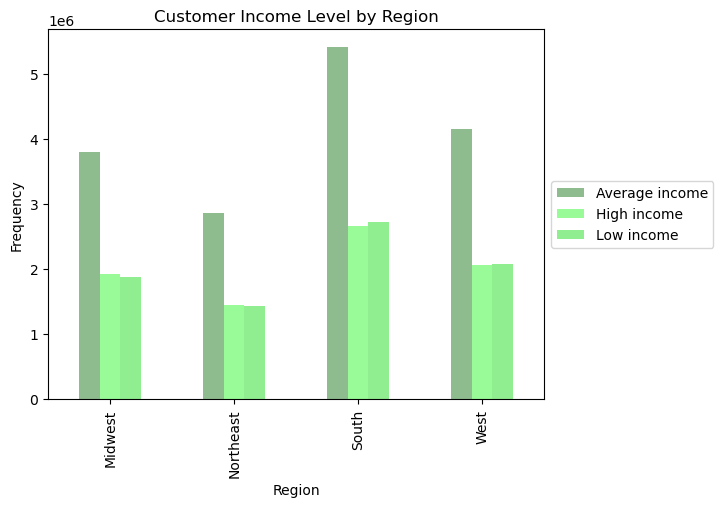

In [106]:
# create bar graph for 'income_region'
income_region_bar = income_region.plot.bar(color = ['darkseagreen','palegreen','lightgreen'], stacked = False, title = 'Customer Income Level by Region', xlabel = 'Region', ylabel = 'Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [107]:
# export 'income_region_bar' as png file
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_income_region_bar.png'))

In [108]:
# group data by 'customer_profile_1' and 'region_flag'
customer_profile_region = df_merge.groupby(['region_flag','customer_profile_1']).size().unstack()

In [109]:
# check new dataframe
customer_profile_region

customer_profile_1,Married adult,Married old adult,Married young adult,Single adult,Single old adult,Single young adult w/ dependants,Single young adult w/o dependants
region_flag,,,,,,,
Midwest,2849887,1411955,1063766,976752,469682,366517,458766
Northeast,2157190,1086686,792445,675357,372266,268114,370678
South,4015751,2025958,1518933,1368948,643462,529584,689249
West,3101343,1565587,1167252,1051218,512505,386388,508620


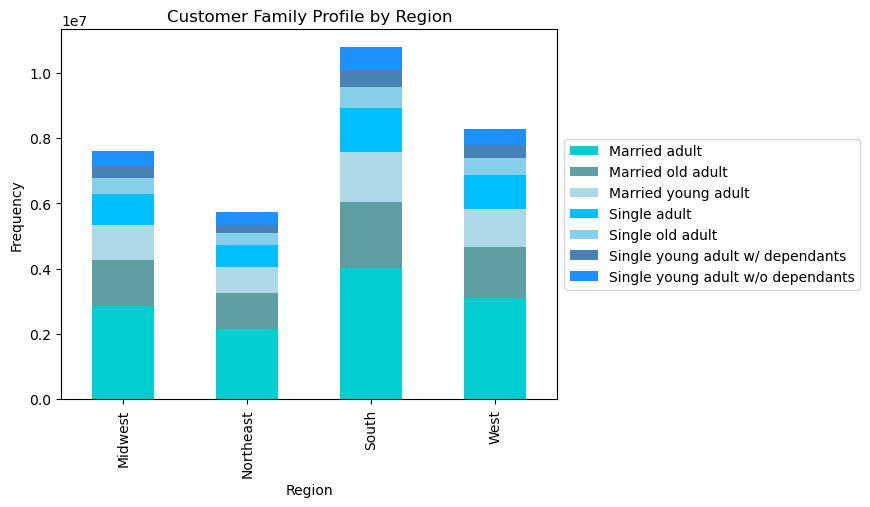

In [110]:
# create bar graph for 'customer_profile_region'
customer_profile_region_bar = customer_profile_region.plot.bar(color = ['darkturquoise','cadetblue','lightblue','deepskyblue','skyblue','steelblue','dodgerblue'], stacked = True, title = 'Customer Family Profile by Region', xlabel = 'Region', ylabel = 'Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [111]:
# export 'customer_profile_region_bar' as png file
customer_profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_region_bar.png'))

In [112]:
# group data by 'department' and 'region_flag'
region_department = df_merge.groupby(['department','region_flag']).size().unstack()

In [113]:
# check new dataframe
region_department

region_flag,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


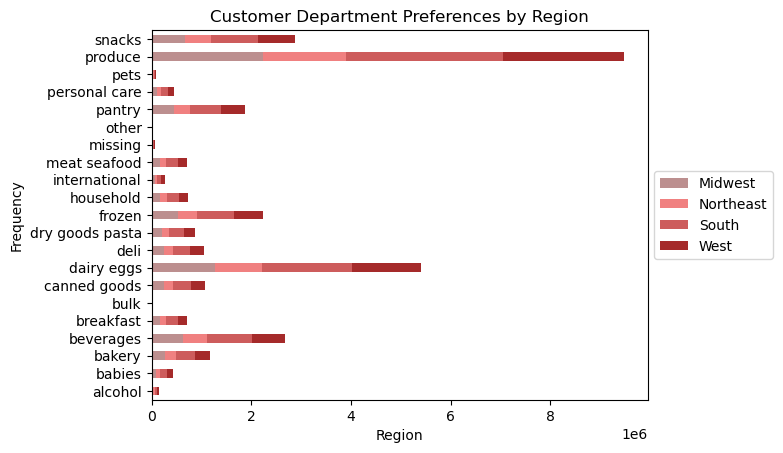

In [114]:
# create horizontal bar graph for 'region_department'
region_department_bar = region_department.plot.barh(color = ['rosybrown','lightcoral','indianred','brown'], stacked = True, title = 'Customer Department Preferences by Region', xlabel = 'Region', ylabel = 'Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [115]:
# export 'region'_department_bar' as png file
region_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_region_department_bar.png'))

In [116]:
# group data by 'department' and 'region_flag'
age_department = df_merge.groupby(['department','age_group']).size().unstack()

In [117]:
# check new dataframe
age_department

age_group,18 to 33 years,34 to 49 years,50 to 65 years,66 to 81 years
department,,,,
alcohol,40549,38313,37886,36948
babies,104929,110692,104955,103226
bakery,294485,294268,292452,291223
beverages,666365,672960,673529,675269
breakfast,178114,176308,175042,173569
bulk,8738,8845,8381,8609
canned goods,269302,267420,265315,266021
dairy eggs,1361505,1363571,1327882,1345789
deli,262956,264999,261153,262141


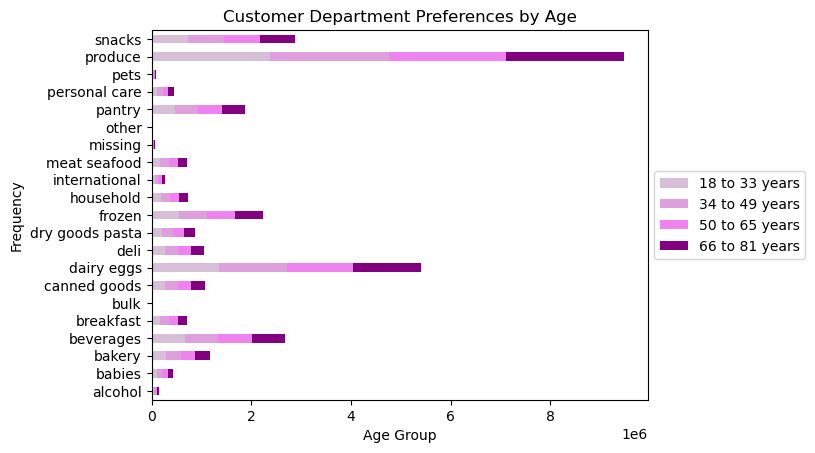

In [118]:
# create horizontal bar graph for 'age_department'
age_department_bar = age_department.plot.barh(color = [ 'thistle','plum','violet','purple'], stacked = True, title = 'Customer Department Preferences by Age', xlabel = 'Age Group', ylabel = 'Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [119]:
# export 'age_department_bar' as png file
age_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_age_department_bar.png'))

In [120]:
# group data by 'department' and 'region_flag'
income_department = df_merge.groupby(['department','income_level']).size().unstack()

In [121]:
# check new dataframe
income_department

income_level,Average income,High income,Low income
department,,,
alcohol,70954,42993,39749
babies,228246,109102,86454
bakery,591935,303286,277207
beverages,1265420,646117,776586
breakfast,335825,170643,196565
bulk,17082,7803,9688
canned goods,552282,280072,235704
dairy eggs,2747208,1371136,1280403
deli,528477,262965,259807


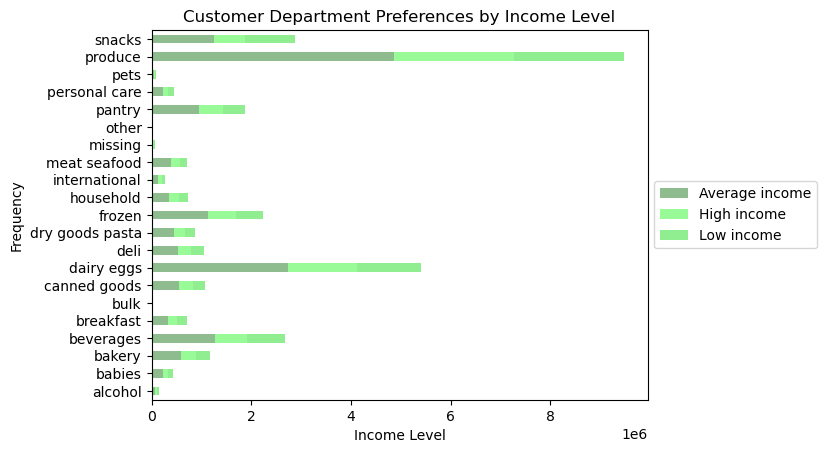

In [122]:
# create horizontal bar graph for 'income_department'
income_department_bar = income_department.plot.barh(color = ['darkseagreen','palegreen','lightgreen'], stacked = True, title = 'Customer Department Preferences by Income Level', xlabel = 'Income Level', ylabel = 'Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [123]:
# export 'income_department_bar' as png file
income_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_income_department_bar.png'))

In [124]:
# group data by 'department' and 'region_flag'
profile_department = df_merge.groupby(['department','customer_profile_1']).size().unstack()

In [125]:
# check new dataframe
profile_department

customer_profile_1,Married adult,Married old adult,Married young adult,Single adult,Single old adult,Single young adult w/ dependants,Single young adult w/o dependants
department,,,,,,,
alcohol,56040,27689,21953,20159,9259,8896,9700
babies,161541,78248,57373,54106,24978,20146,27410
bakery,438079,219719,164083,148641,71504,56142,74260
beverages,1005271,509272,374509,341218,165997,124629,167227
breakfast,262250,132055,99420,89100,41514,34731,43963
bulk,13065,6600,4956,4161,2009,1674,2108
canned goods,398926,201703,151401,133809,64318,51190,66711
dairy eggs,2012911,1012878,762809,678542,332911,260787,337909
deli,392028,197392,146269,134124,64749,50415,66272


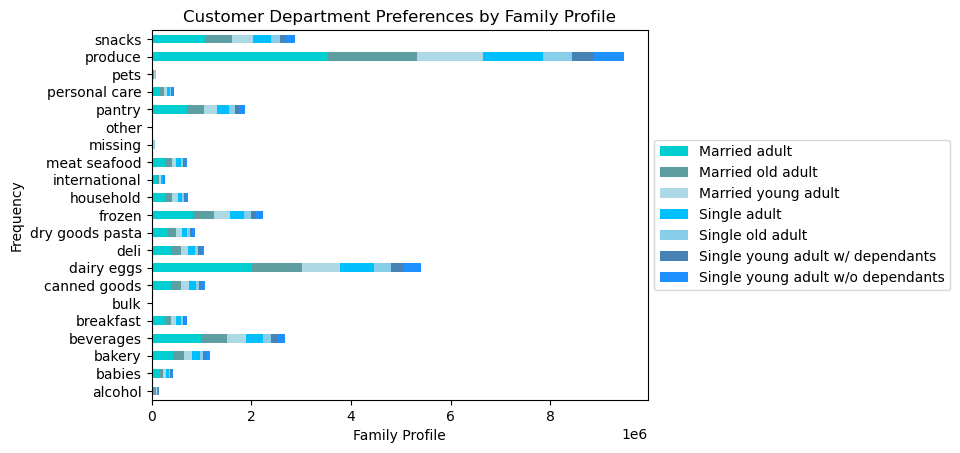

In [126]:
# create horizontal bar graph for 'profile_department'
profile_department_bar = profile_department.plot.barh(color = ['darkturquoise','cadetblue','lightblue','deepskyblue','skyblue','steelblue','dodgerblue'], stacked = True, title = 'Customer Department Preferences by Family Profile', xlabel = 'Family Profile', ylabel = 'Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [127]:
# export 'profile_department_bar' as png file
profile_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_department_bar.png'))

In [128]:
# group data by 'income_level' and 'customer_profile_1'
profile_income = df_merge.groupby(['income_level','customer_profile_1']).size().unstack()

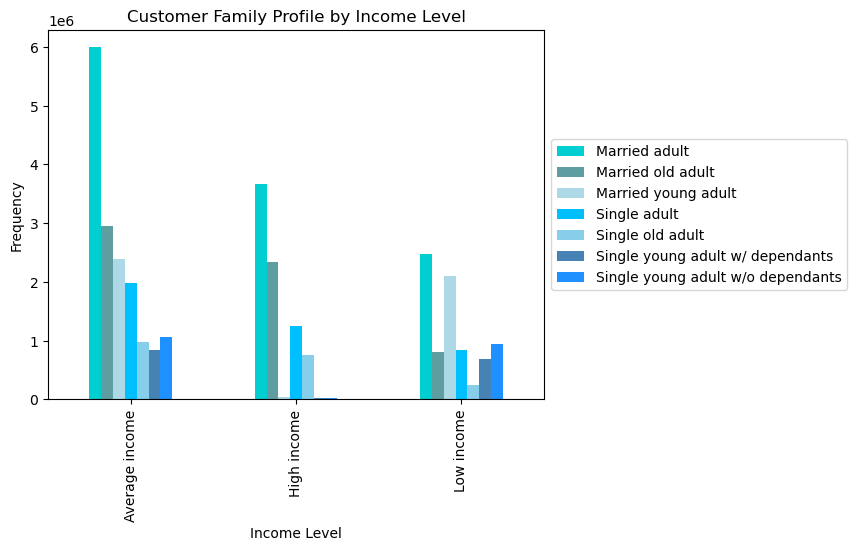

In [129]:
# create bar chart for 'profile_income'
profile_income_bar = profile_income.plot.bar(color = ['darkturquoise','cadetblue','lightblue','deepskyblue','skyblue','steelblue','dodgerblue'], stacked = False, title = 'Customer Family Profile by Income Level', xlabel = 'Income Level', ylabel = 'Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [130]:
# export 'profile_department_bar' as png file
profile_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_income_bar.png'))

In [131]:
# export 'df_merge' as pickle file
df_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_data_final.pkl'))